In [9]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [12]:
import matplotlib.pyplot as plt

In [46]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

concat = pd.read_csv(file_loc)
concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
concat['model_version'] = concat['model_version'].str.replace('____',  '.')
concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)

In [47]:
pd.read_csv(file_loc)

,mouse_id,channel,name,model_version,run_num,mse_tr,mse_cv,mse_te
0,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=0,0.835553,0.836647,0.844109
1,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=1,0.842391,0.844486,0.837436
2,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=2,0.837984,0.834263,0.842197
3,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=0,0.764837,0.764655,0.772109
4,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=1,0.770075,0.774374,0.766757
...,...,...,...,...,...,...,...,...
139,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=1,0.972045,0.977520,0.977693
140,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=2,0.975116,0.974702,0.974622
141,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=0,0.981219,0.980546,0.968520
142,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_words,base_words_max_iter10000__fit_interceptFalse__...,num=1,0.972045,0.977469,0.977693


In [48]:
concat

mse_tr  \
channel name       model_version                      run_num             
gACH    base_words base_words_alpha0.01__l1_ratio0.01 num=0    0.835553   
                                                      num=1    0.842391   
                                                      num=2    0.837984   
                   base_words_alpha0.01__l1_ratio0.0  num=0    0.764837   
                                                      num=1    0.770075   
...                                                                 ...   
gDA     base_words base_words_alpha1.0__l1_ratio0.1   num=1    0.972045   
                                                      num=2    0.975116   
                   base_words_alpha1.0__l1_ratio1.0   num=0    0.981219   
                                                      num=1    0.972045   
                                                      num=2    0.975116   

                                                                 mse_cv  \
channel name       model_version                      run_num             
gACH    base_words base_words_alpha0.01__l1_ratio0.01 num=0    0.836647   
                                                      num=1    0.844486   
                                                      num=2    0.834263   
                   base_words_alpha0.01__l1_ratio0.0  num=0    0.764655   
                                                      num=1    0.774374   
...                                                                 ...   
gDA     base_words base_words_alpha1.0__l1_ratio0.1   num=1    0.977520   
                                                      num=2    0.974702   
                   base_words_alpha1.0__l1_ratio1.0   num=0    0.980546   
                                                      num=1    0.977469   
                                                      num=2    0.975135   

                                                                 mse_te  
channel name       model_version                      run_num            
gACH    base_words base_words_alpha0.01__l1_ratio0.01 num=0    0.844109  
                                                      num=1    0.837436  
                                                      num=2    0.842197  
                   base_words_alpha0.01__l1_ratio0.0  num=0    0.772109  
                                                      num=1    0.766757  
...                                                                 ...  
gDA     base_words base_words_alpha1.0__l1_ratio0.1   num=1    0.977693  
                                                      num=2    0.974622  
                   base_words_alpha1.0__l1_ratio1.0   num=0    0.968520  
                                                      num=1    0.977693  
                                                      num=2    0.974622  

[144 rows x 3 columns]

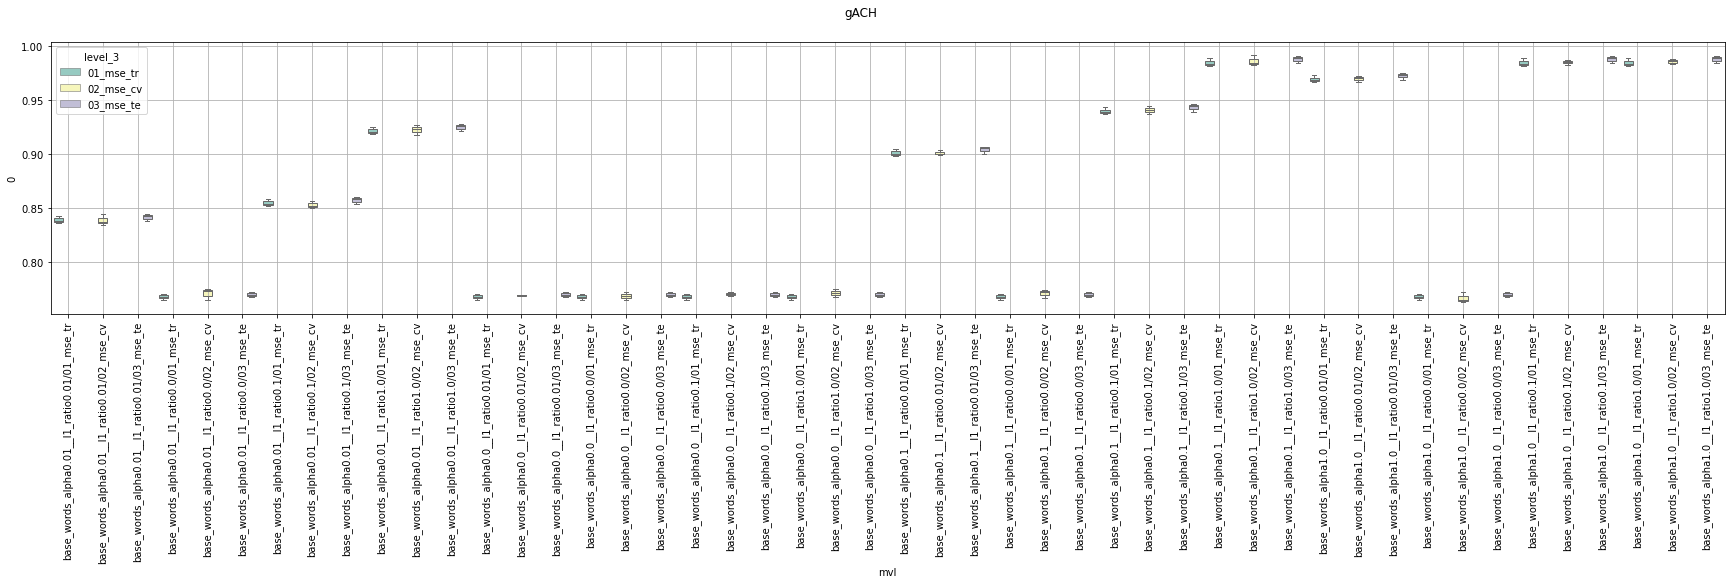

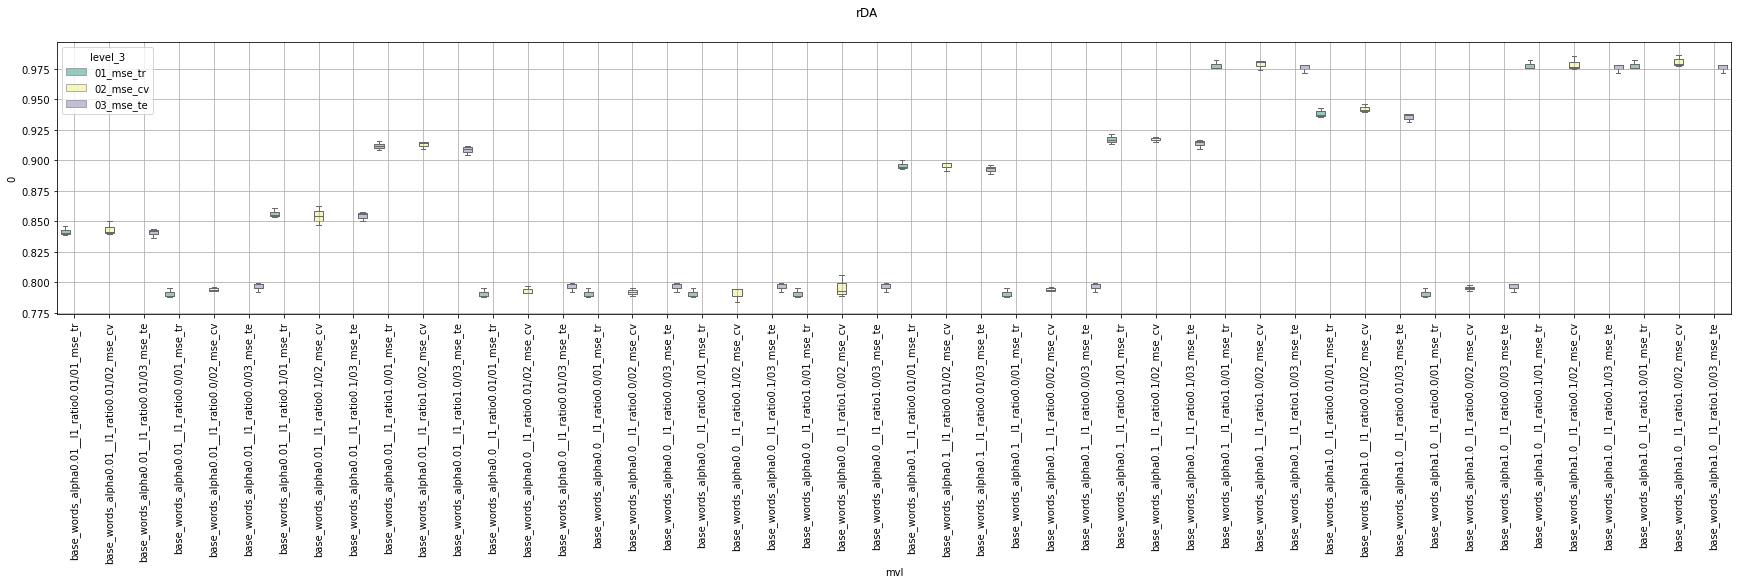

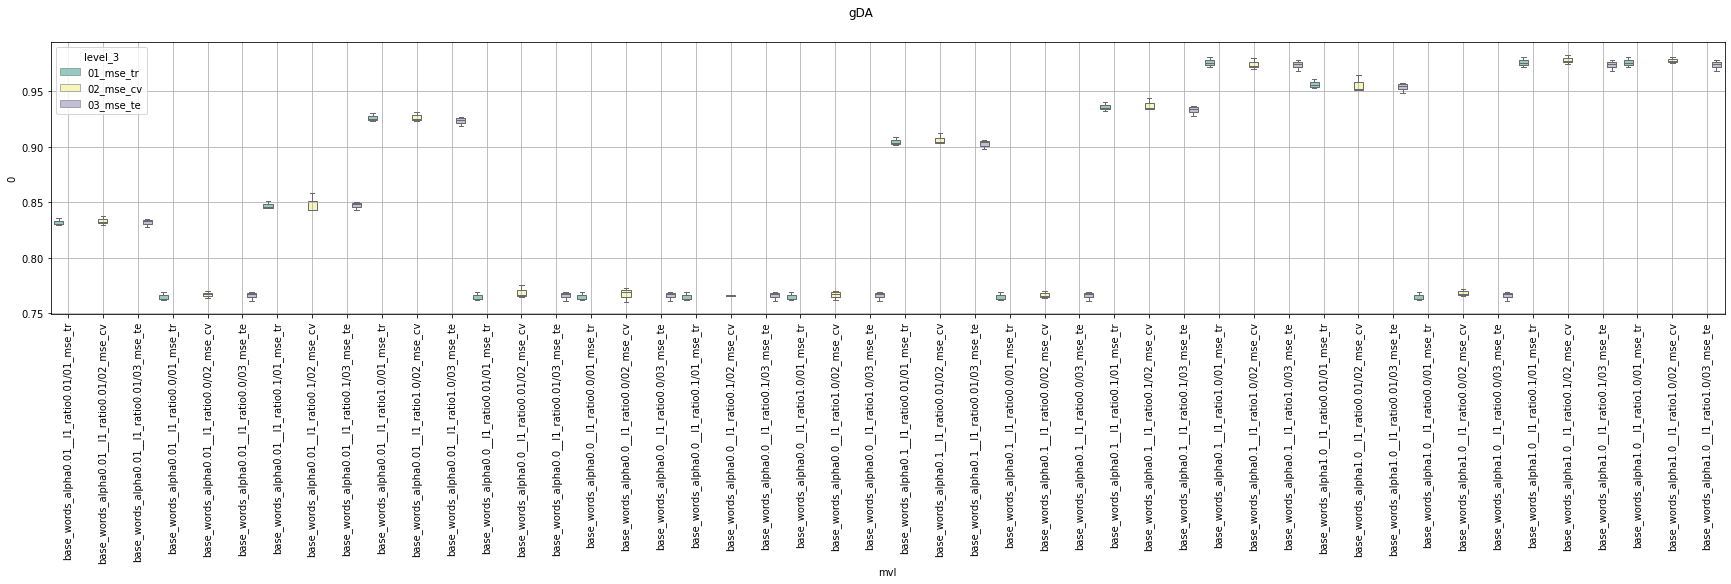

In [49]:
import seaborn as sns
for chl in concat.reset_index()['channel'].unique():
    
    fig, ax = plt.subplots(1,1,figsize=(30,5))
    
    fig.suptitle(chl)
    fig.set_facecolor('w')
    
    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)
    
    vbp = concat.loc[chl].rename({'mse_tr':'01_mse_tr', 'mse_cv':'02_mse_cv', 'mse_te':'03_mse_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['model_version'] + '/' + vbp['level_3']
    
    sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=90)